In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("framingham_heart_disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.shape

(4238, 16)

In [5]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
import numpy as np
education_arr = np.array(df.education)

<Axes: ylabel='education'>

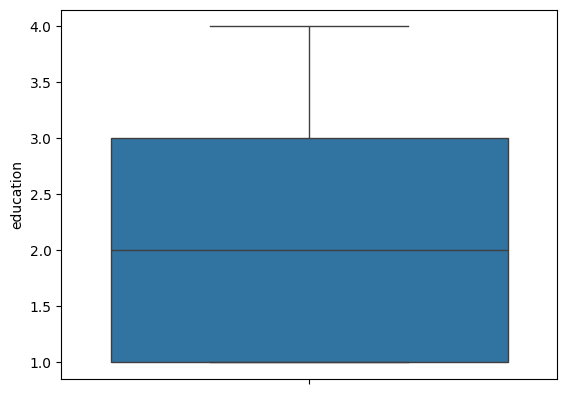

In [9]:
import seaborn as sns
sns.boxplot(df.education)

In [10]:
df.education.median()

2.0

In [11]:
df.education.unique()

array([ 4.,  2.,  1.,  3., nan])

In [12]:
 
df.education = df.education.fillna(df.education.median())

In [13]:
df.education.unique()

array([4., 2., 1., 3.])

In [14]:
df.duplicated().sum()

0

In [15]:
df.cigsPerDay.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [16]:
df.cigsPerDay.mode()

0    0.0
Name: cigsPerDay, dtype: float64

In [17]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [18]:
df.cigsPerDay.median()

0.0

<Axes: ylabel='cigsPerDay'>

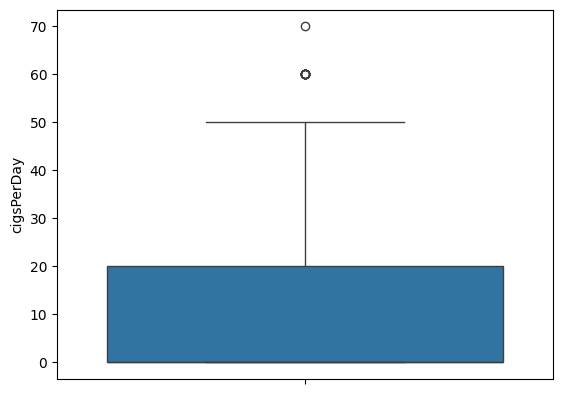

In [19]:
sns.boxplot(df.cigsPerDay)

In [20]:
q1 = df.cigsPerDay.quantile(0.25)

In [21]:
q3 = df.cigsPerDay.quantile(0.75)

In [22]:
IQR = q3 - q1

In [23]:
IQR

20.0

In [24]:
## Here Flooring and capping Outlier treatment is used

lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR
df['cigsPerDay']=np.where(df['cigsPerDay']>upper_fence, upper_fence, np.where(df['cigsPerDay']<lower_fence, lower_fence, df['cigsPerDay']))

<Axes: ylabel='cigsPerDay'>

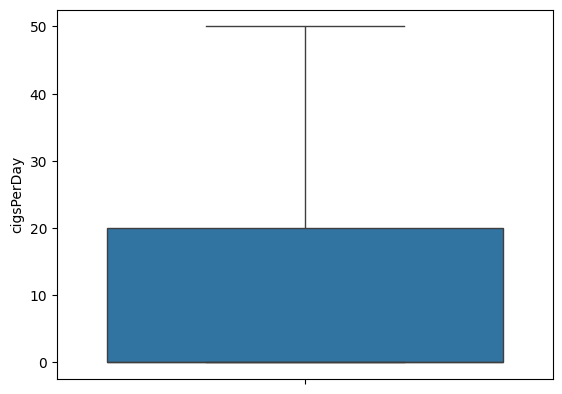

In [25]:
sns.boxplot(df.cigsPerDay)

In [26]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [27]:
df.cigsPerDay = df.cigsPerDay.fillna(df.cigsPerDay.std())

In [28]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

<Axes: ylabel='cigsPerDay'>

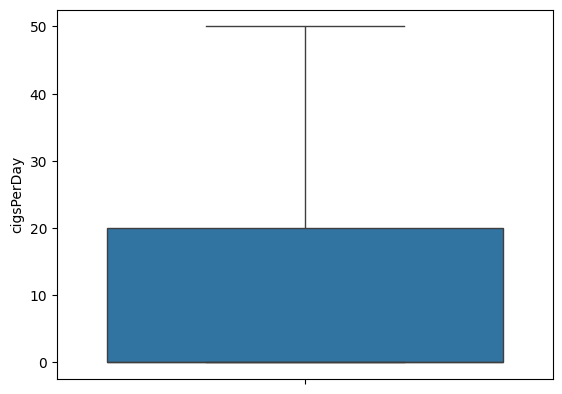

In [29]:
sns.boxplot(df.cigsPerDay)

<Axes: >

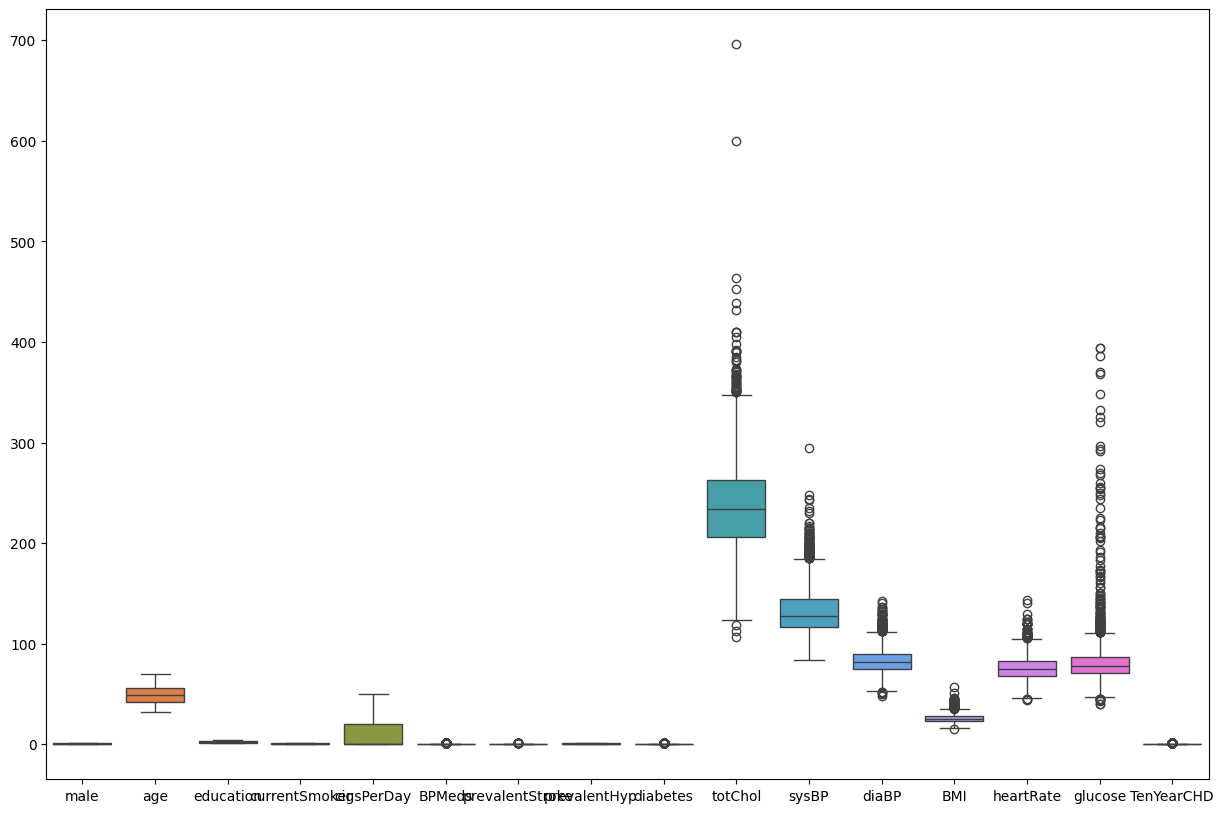

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [31]:
def outliers_treatment(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df[x] = np.where(df[x] > upper_fence, upper_fence,np.where(df[x] < lower_fence,lower_fence,df[x]))

In [32]:
columns = df.columns

In [33]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [34]:
for i in range(len(columns)-1):
    outliers_treatment(columns[i])

In [35]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

<Axes: >

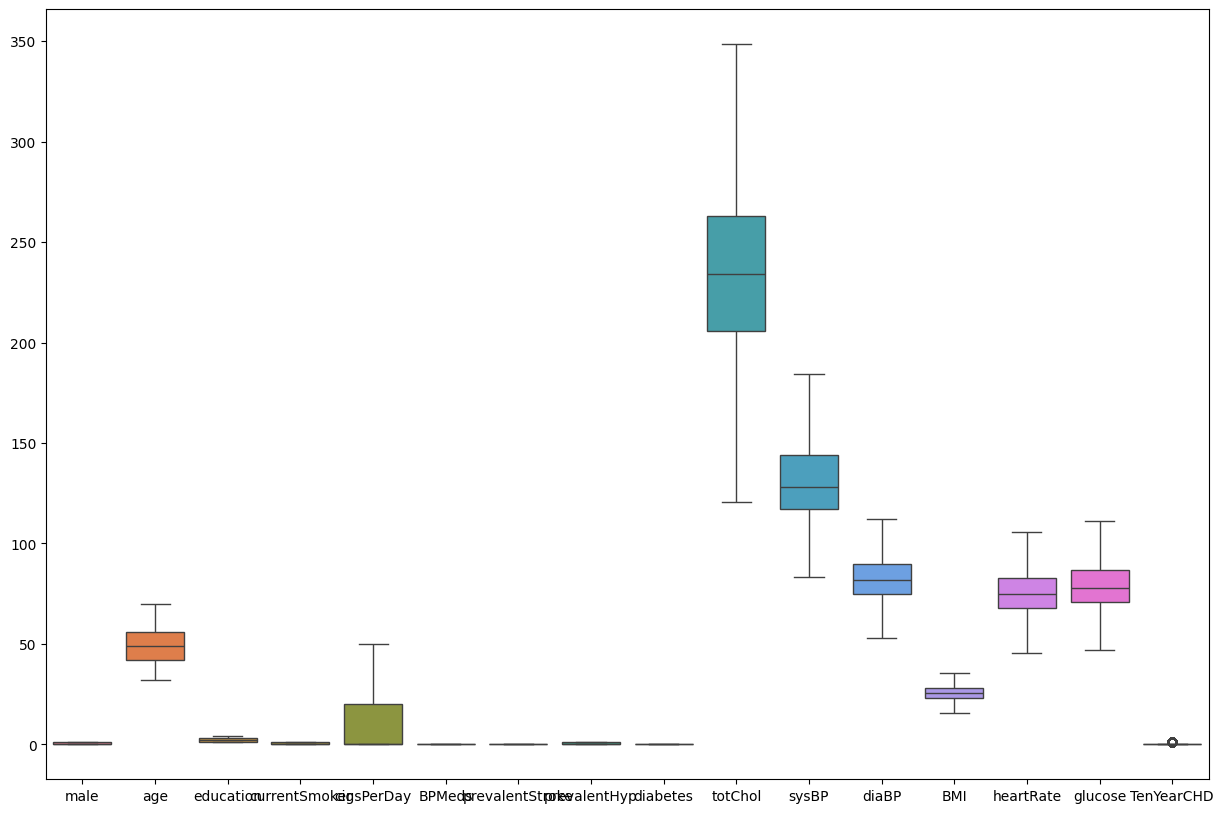

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [37]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [38]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [39]:
df.BPMeds.unique()

array([ 0., nan])

In [40]:
df.drop('BPMeds',axis=1,inplace=True)

In [41]:
df.totChol.unique()

array([195. , 250. , 245. , 225. , 285. , 228. , 205. , 313. , 260. ,
       254. , 247. , 294. , 332. , 226. , 221. , 232. , 291. , 190. ,
       185. , 234. , 215. , 270. , 272. , 295. , 209. , 175. , 214. ,
       257. , 178. , 233. , 180. , 243. , 237. ,   nan, 311. , 208. ,
       252. , 261. , 179. , 194. , 267. , 216. , 240. , 266. , 255. ,
       220. , 235. , 212. , 223. , 300. , 302. , 248. , 200. , 189. ,
       258. , 202. , 213. , 183. , 274. , 170. , 210. , 197. , 326. ,
       188. , 256. , 244. , 193. , 239. , 296. , 269. , 275. , 268. ,
       265. , 173. , 273. , 290. , 278. , 264. , 282. , 241. , 288. ,
       222. , 303. , 246. , 150. , 187. , 286. , 154. , 279. , 293. ,
       259. , 219. , 230. , 320. , 312. , 165. , 159. , 174. , 242. ,
       301. , 167. , 308. , 325. , 229. , 236. , 224. , 253. , 348.5,
       171. , 186. , 227. , 249. , 176. , 163. , 191. , 263. , 196. ,
       310. , 164. , 135. , 238. , 207. , 342. , 287. , 182. , 284. ,
       217. , 203. ,

In [42]:
df.totChol = df.totChol.fillna(df.totChol.median())

In [43]:
df.BMI.unique()

array([26.97, 28.73, 25.34, ..., 27.11, 30.48, 26.7 ])

In [44]:
df.BMI = df.BMI.fillna(df.BMI.median())

In [45]:
df.heartRate.unique()

array([ 80. ,  95. ,  75. ,  65. ,  85. ,  77. ,  60. ,  79. ,  76. ,
        93. ,  72. ,  98. ,  64. ,  70. ,  71. ,  62. ,  73. ,  90. ,
        96. ,  68. ,  63. ,  88. ,  78. ,  83. , 100. ,  67. ,  84. ,
        57. ,  50. ,  74. ,  86. ,  55. ,  92. ,  66. ,  87. , 105.5,
        81. ,  56. ,  89. ,  82. ,  48. , 105. ,  61. ,  54. ,  69. ,
        52. ,  94. ,  58. , 104. ,  91. ,  53. ,   nan,  59. ,  51. ,
       102. , 103. ,  45.5,  47. ,  97. ,  99. , 101. ,  46. ])

In [46]:
df.heartRate =df.heartRate.fillna(df.heartRate.median())

In [47]:
df.glucose.unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 111.,  75.,  83.,  66.,  74.,  63.,
        87.,  90.,  80., 100.,  98.,  62.,  95.,  94.,  55.,  82.,  93.,
        73.,  47.,  68.,  97., 104.,  96., 105.,  71.,  56.,  60., 102.,
        58.,  92., 109.,  86., 107.,  54.,  67.,  69.,  57.,  91.,  59.,
        81., 110., 108., 106., 101.,  53.,  50.,  48.,  52.])

In [48]:
df.glucose = df.glucose.fillna(df.glucose.median())

In [49]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

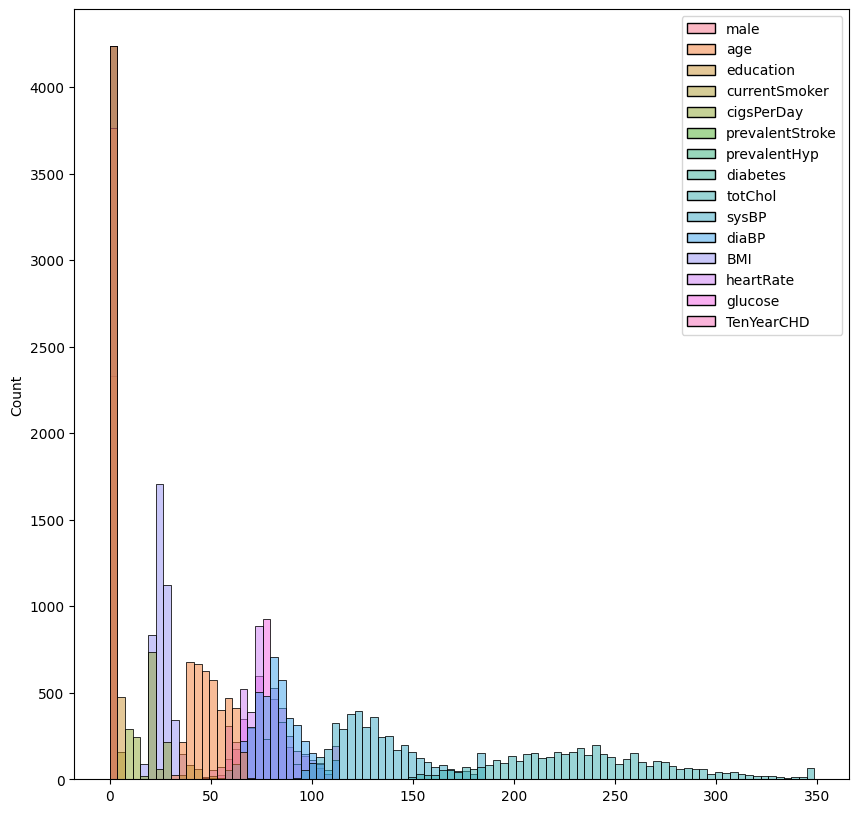

In [51]:
plt.figure(figsize = (10,10))
sns.histplot(df)

In [93]:
columns=df.columns

In [94]:
columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')

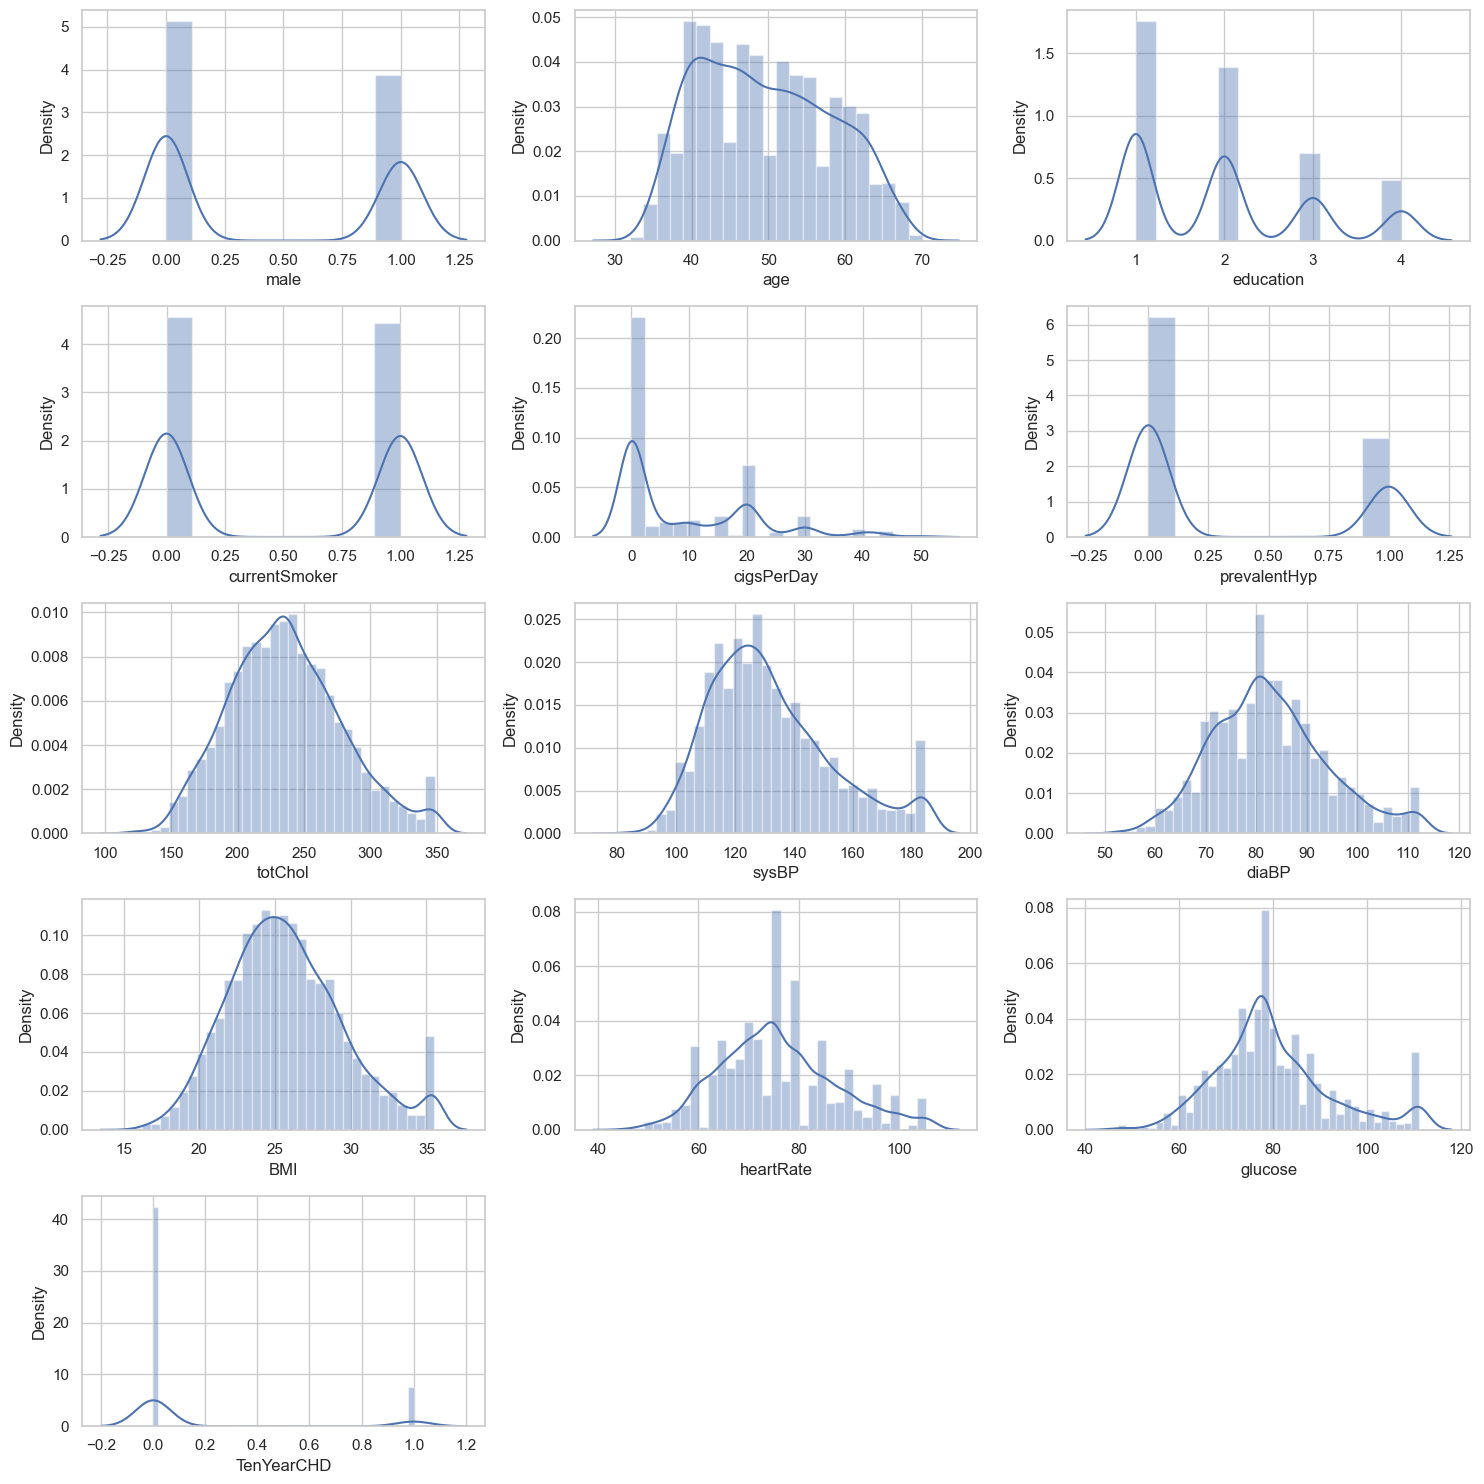

In [95]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,15))
for i in range(len(columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[columns[i]])
    plt.tight_layout()
plt.show()

In [96]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [97]:
df.TenYearCHD

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [98]:
df.drop(['diabetes','prevalentStroke'],axis=1,inplace=True)

KeyError: "['diabetes', 'prevalentStroke'] not found in axis"

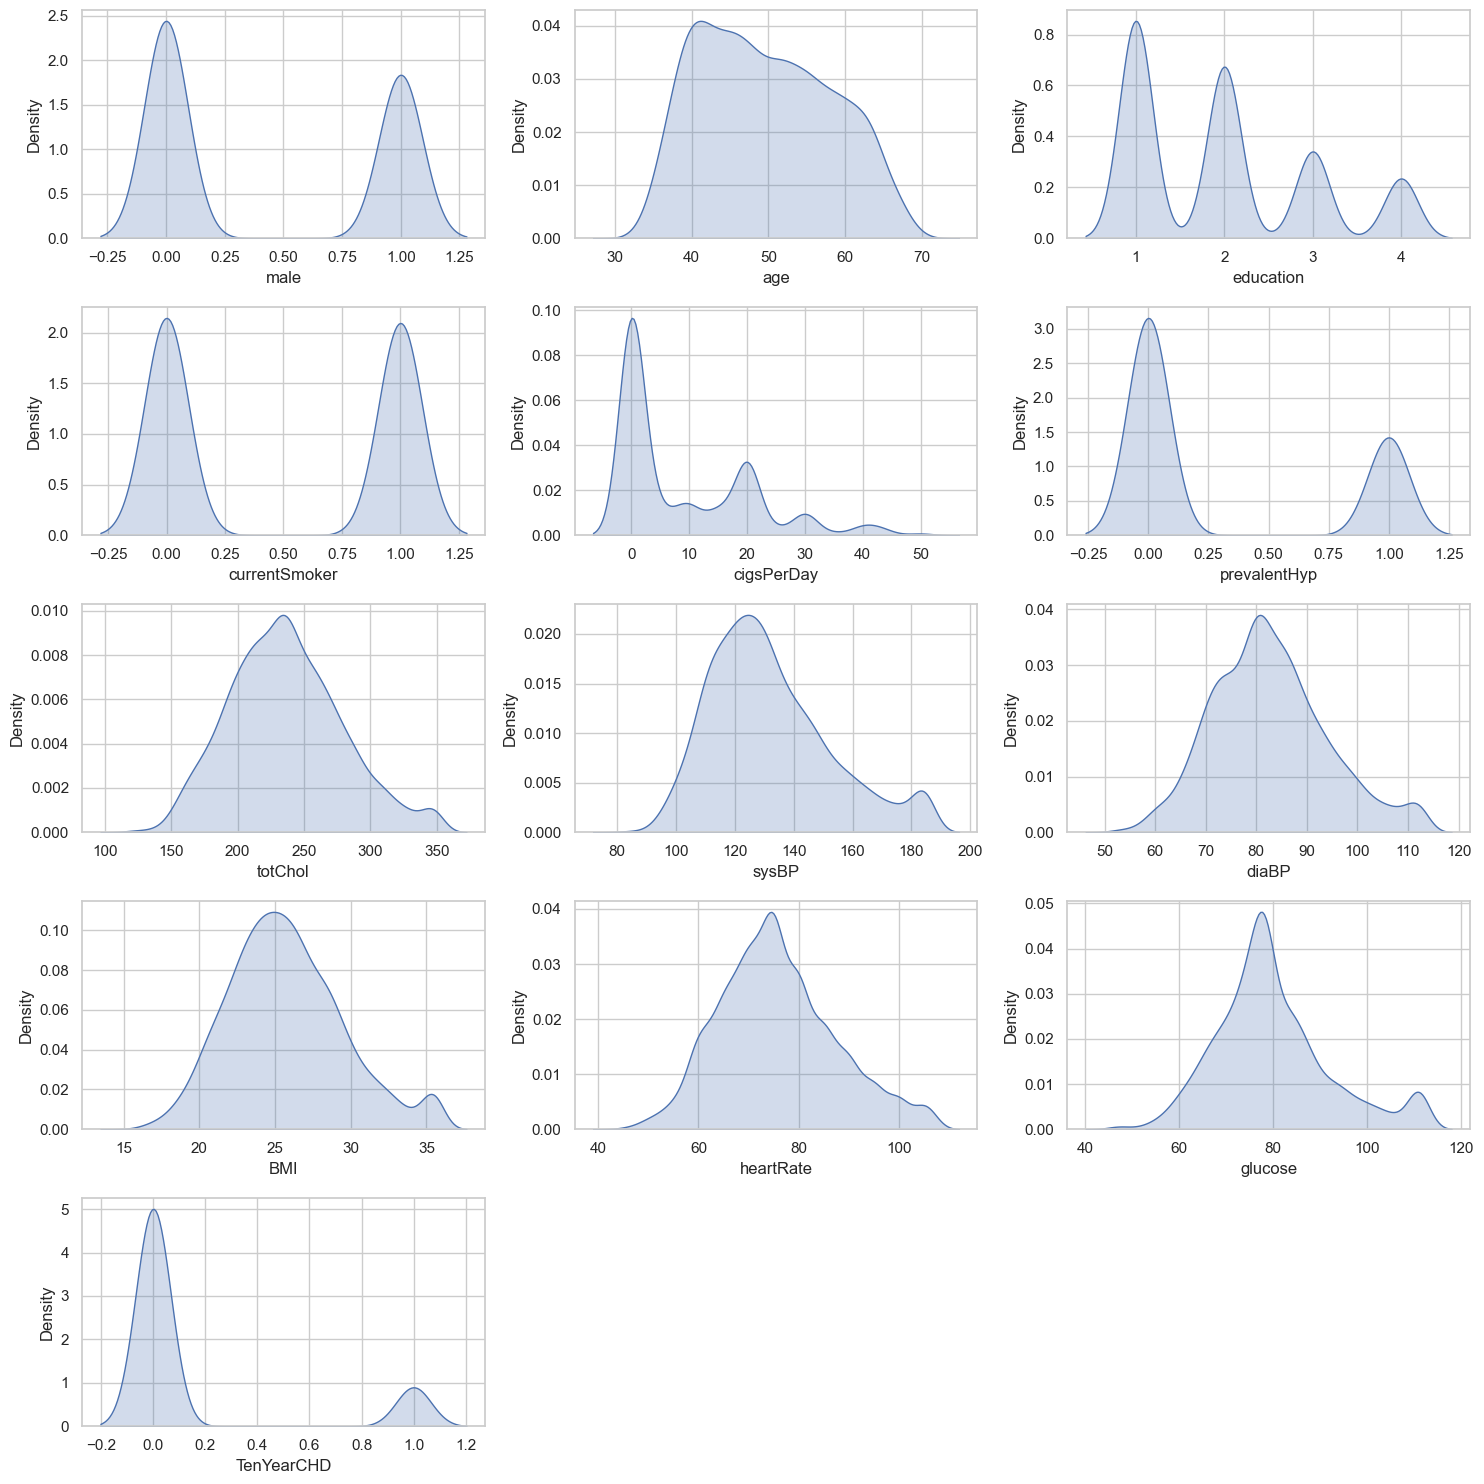

In [99]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,15))
for i in range(len(columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(df[columns[i]],shade=True)
    plt.tight_layout()
plt.show()

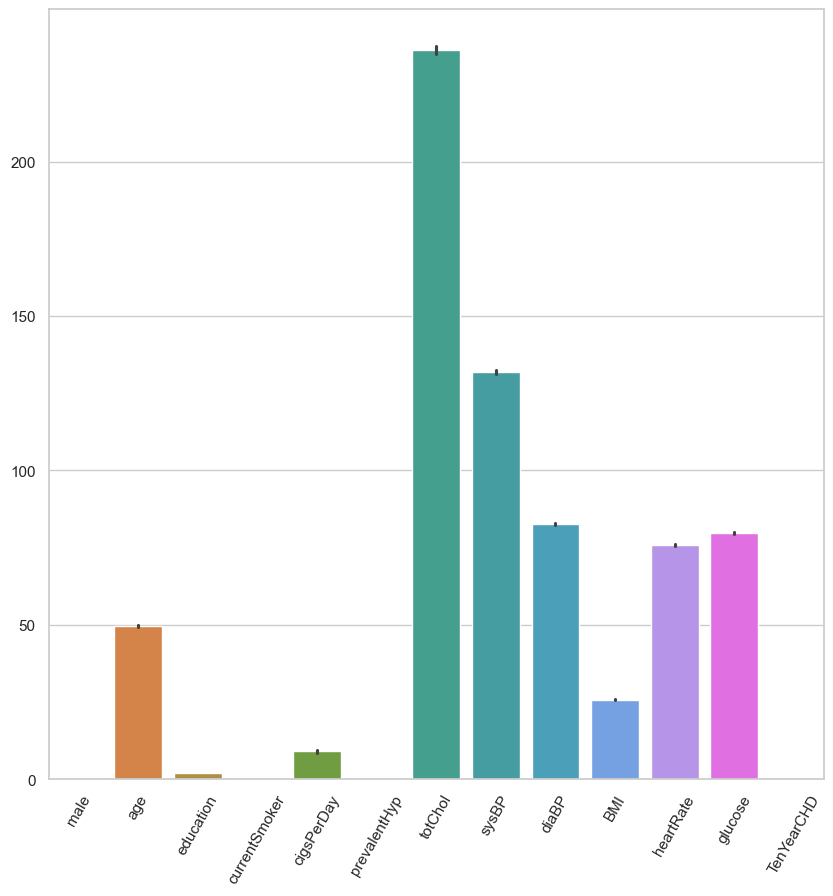

In [100]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.barplot(df)
plt.xticks(rotation=60)
plt.show()

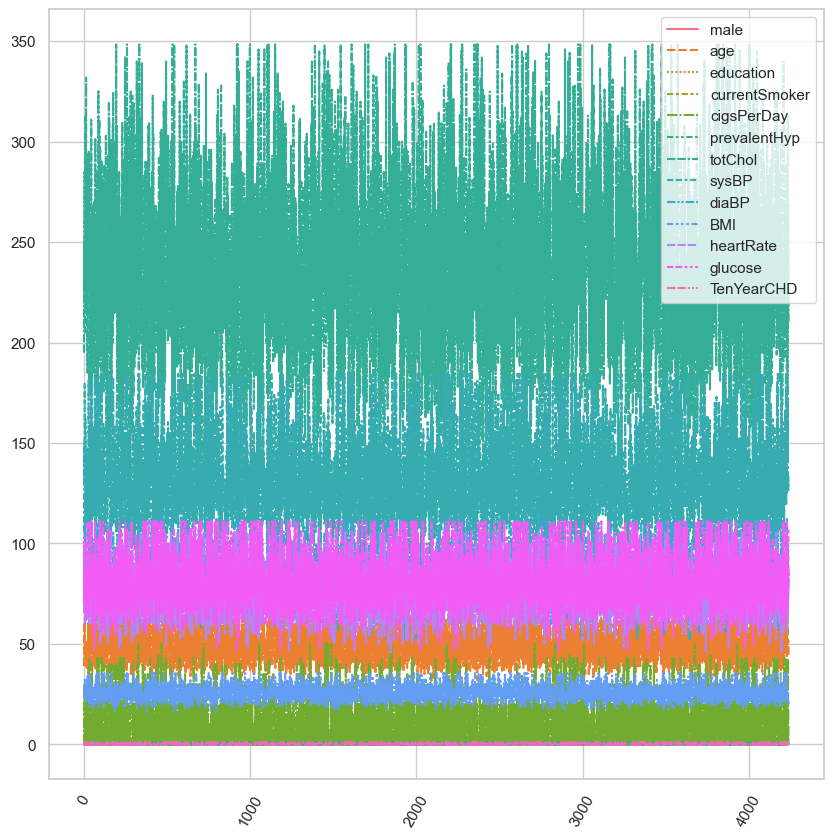

In [101]:
plt.figure(figsize=(10,10))
sns.lineplot(df)
plt.xticks(rotation=60)
plt.show()

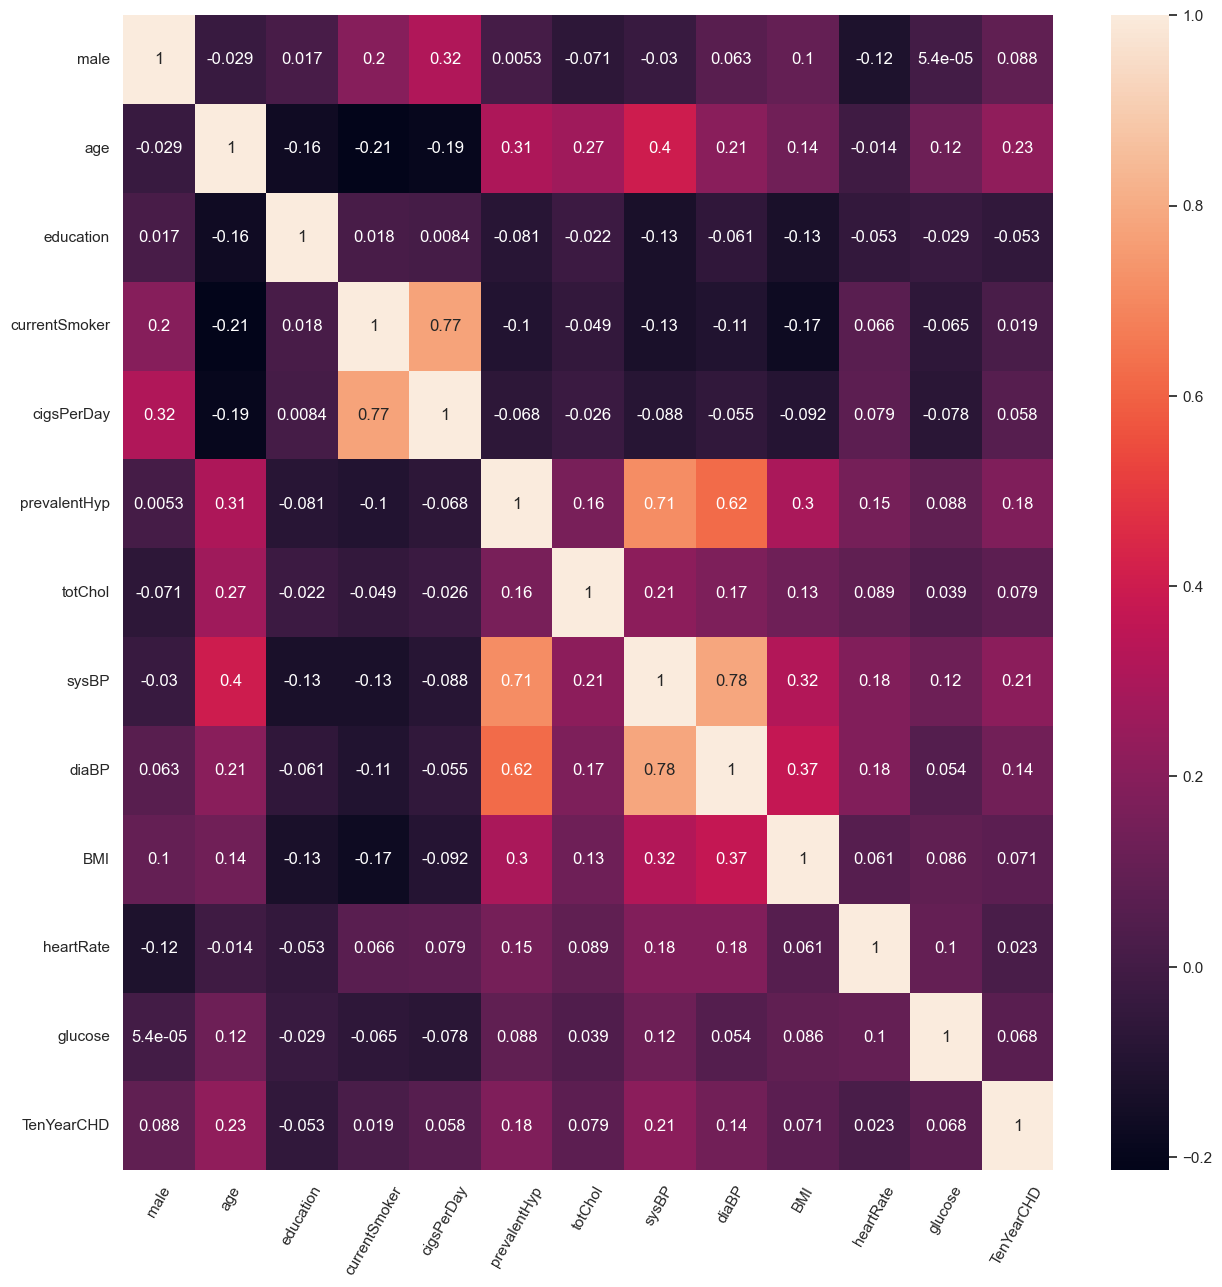

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True)
plt.xticks(rotation=60)
plt.show()

ValueError: x must be 1D

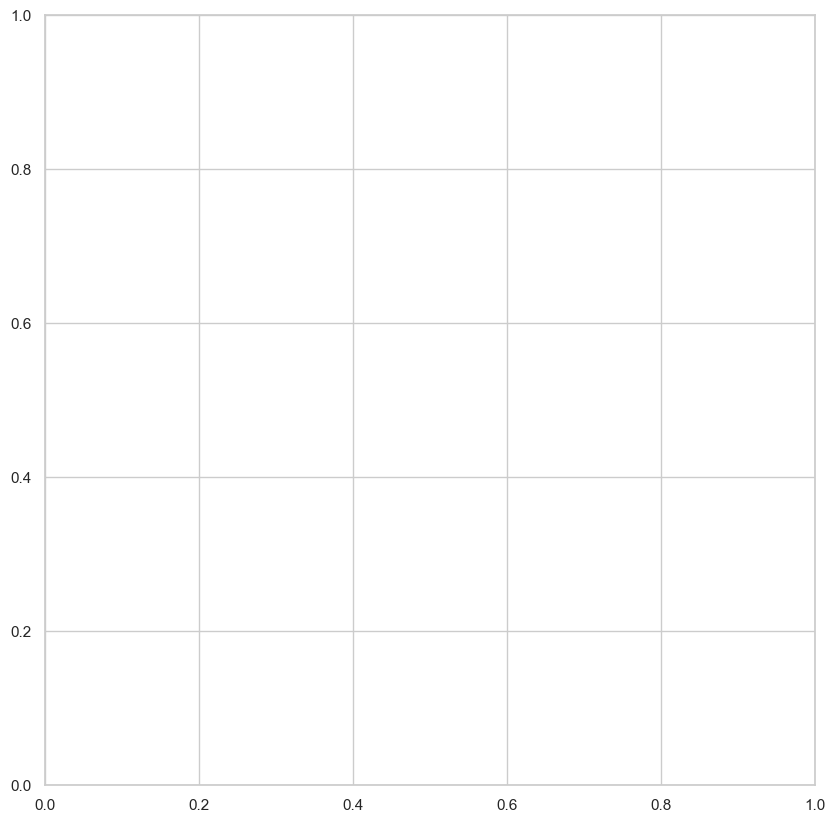

In [105]:
plt.figure(figsize=(10,10))
plt.pie(x=df[], labels=df.columns, colors=sns.color_palette('bright'), autopct='%.0f%%')

In [106]:
df.to_csv("heart_disease.csv")